In [1]:

import numpy as np
import pandas as pd


from sklearn.model_selection import train_test_split

import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.compat import lzip
import statsmodels.api as sm
from statsmodels.formula.api import ols

from scipy import stats
import scipy.stats as stats
import matplotlib.pyplot as plt

import os
import seaborn as sns

%matplotlib inline

In [2]:
# Reading dataset and creating dataframe

marks = pd.read_csv(r"C:\Users\Administrator\Desktop\Competition\dockship_Exam Marks\exam_mark_prediction_ai_challenge-dataset\train.csv")
marks.head() # show 5 rows and all columns of dataframe

,Unnamed: 0,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score
0,0,male,group C,some college,standard,none,61,62,61
1,1,female,group C,associate's degree,standard,none,62,53,53
2,2,female,group C,some college,free/reduced,completed,75,70,67
3,3,male,group C,some high school,free/reduced,none,76,65,79
4,4,male,group A,high school,free/reduced,none,58,44,53


In [3]:
marks = marks.drop(['Unnamed: 0'],axis = 1)

In [4]:
marks.head()

,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score
0,male,group C,some college,standard,none,61,62,61
1,female,group C,associate's degree,standard,none,62,53,53
2,female,group C,some college,free/reduced,completed,75,70,67
3,male,group C,some high school,free/reduced,none,76,65,79
4,male,group A,high school,free/reduced,none,58,44,53


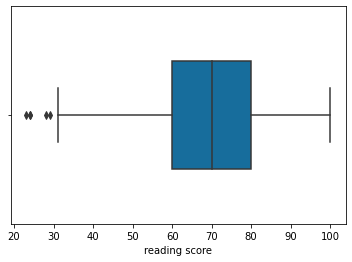

In [5]:
##outlier present 
marks_reading = sns.boxplot( x='reading score', 
                 data=marks, 
                 width=0.5,
                 palette="colorblind")

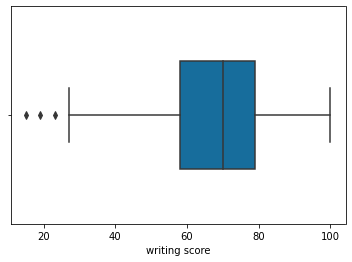

In [6]:
##outlier present 
marks_reading = sns.boxplot( x='writing score', 
                 data=marks, 
                 width=0.5,
                 palette="colorblind")

In [7]:
marks.head()

,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score
0,male,group C,some college,standard,none,61,62,61
1,female,group C,associate's degree,standard,none,62,53,53
2,female,group C,some college,free/reduced,completed,75,70,67
3,male,group C,some high school,free/reduced,none,76,65,79
4,male,group A,high school,free/reduced,none,58,44,53


## outlier removal

In [8]:
marks_Z = np.abs(stats.zscore(marks[["reading score","writing score"]]))

In [9]:
marks_Z

array([[0.59980548, 0.42706749],
       [0.53126747, 1.01865174],
       [0.35972663, 0.09878518],
       ...,
       [0.66834349, 0.36133591],
       [0.49680265, 0.36171151],
       [0.22265061, 0.03267799]])

In [10]:
print(np.where(marks_Z > 3))

(array([140, 140, 286, 623, 623], dtype=int64), array([0, 1, 0, 0, 1], dtype=int64))


In [11]:
marks.iloc[[140,286,623]]


,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score
140,male,group B,high school,free/reduced,none,24,15,30
286,female,group B,high school,free/reduced,none,24,23,8
623,male,group A,some college,free/reduced,none,23,19,28


We can't remove these outlier since the student may be fail , so wenedd to reat with dataset

In [12]:
marks.head()

,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score
0,male,group C,some college,standard,none,61,62,61
1,female,group C,associate's degree,standard,none,62,53,53
2,female,group C,some college,free/reduced,completed,75,70,67
3,male,group C,some high school,free/reduced,none,76,65,79
4,male,group A,high school,free/reduced,none,58,44,53


In [13]:
marks.columns

Index(['gender', 'ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'reading score', 'writing score',
       'math score'],
      dtype='object')

In [14]:

marks['gender'].unique()

array(['male', 'female'], dtype=object)

In [15]:
for col in marks.columns:
    print(col, ': ', len(marks[col].unique()), ' labels')

gender :  2  labels
ethnicity :  5  labels
parental level of education :  6  labels
lunch :  2  labels
test preparation course :  2  labels
reading score :  70  labels
writing score :  73  labels
math score :  77  labels


In [16]:
## check any null value
marks.isnull().sum()

gender                         0
ethnicity                      0
parental level of education    0
lunch                          0
test preparation course        0
reading score                  0
writing score                  0
math score                     0
dtype: int64

In [17]:
## relationship of various variable with math score
M_G = marks.groupby('gender')

In [18]:
M_G.mean()

,reading score,writing score,math score
gender,,,
female,73.065395,72.901907,64.005450
male,66.099099,63.642643,69.129129


## showa that though female having higher socre in reading ,writing socre but math  score is less than male

In [19]:
M_E = marks.groupby('ethnicity')

In [20]:
M_E.mean()

,reading score,writing score,math score
ethnicity,,,
group A,64.275862,61.620690,61.241379
group B,67.085106,65.163121,63.127660
group C,69.885845,68.538813,65.018265
group D,70.880435,71.173913,67.815217
group E,74.408163,72.244898,74.897959


## group A to E , reading,writing,math score increases



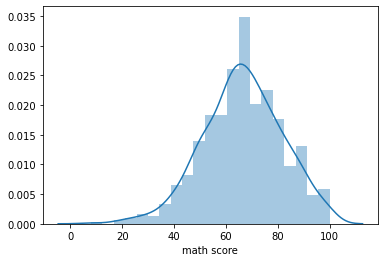

In [21]:
## distribution of reading,writing,math score
sns.distplot(marks["math score"])

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


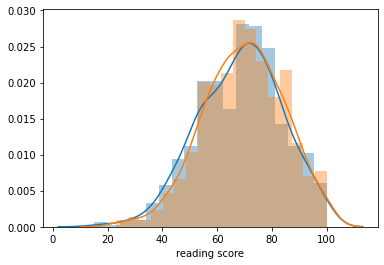

In [22]:
# distribution of reading,writing score
print(sns.distplot(marks["writing score"]))
print(sns.distplot(marks["reading score"]))


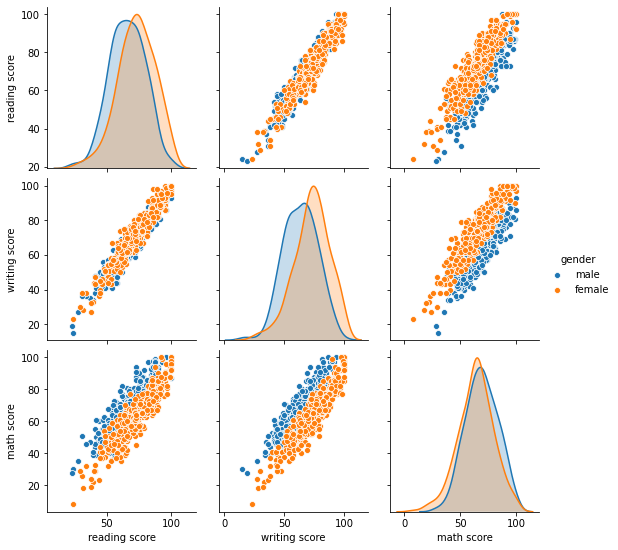

In [23]:
sns.pairplot(marks,hue='gender')

In [24]:
## scaling using min-max
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [25]:
cols_to_norm = ['reading score','writing score']
marks[cols_to_norm] = scaler.fit_transform(marks[cols_to_norm])

In [26]:
marks[cols_to_norm]

,reading score,writing score
0,0.493506,0.552941
1,0.506494,0.447059
2,0.675325,0.647059
3,0.688312,0.588235
4,0.454545,0.341176
...,...,...
695,0.753247,0.752941
696,0.818182,0.788235
697,0.480519,0.564706
698,0.701299,0.694118


In [27]:
marks.head()

,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score
0,male,group C,some college,standard,none,0.493506,0.552941,61
1,female,group C,associate's degree,standard,none,0.506494,0.447059,53
2,female,group C,some college,free/reduced,completed,0.675325,0.647059,67
3,male,group C,some high school,free/reduced,none,0.688312,0.588235,79
4,male,group A,high school,free/reduced,none,0.454545,0.341176,53


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


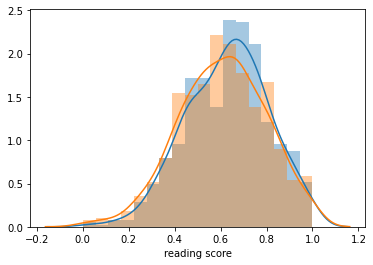

In [28]:
# distribution of reading,writing score
print(sns.distplot(marks["writing score"]))
print(sns.distplot(marks["reading score"]))


In [29]:
marks.columns

Index(['gender', 'ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'reading score', 'writing score',
       'math score'],
      dtype='object')

In [30]:
## create dummy variables
## create dummy variable
gender_dummy = pd.get_dummies(marks['gender'],drop_first = True)
ethnicity_dummy = pd.get_dummies(marks['ethnicity'],drop_first = True)
parental_dummy = pd.get_dummies(marks['parental level of education'],drop_first = True)
lunch_dummy = pd.get_dummies(marks['lunch'],drop_first = True)
course_dummy = pd.get_dummies(marks['test preparation course'],drop_first = True)


In [31]:
## concate along column wise 
marks = pd.concat([marks,gender_dummy,ethnicity_dummy,parental_dummy,lunch_dummy,course_dummy],axis = 1)

In [32]:
marks.head(3)

,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score,male,group B,group C,group D,group E,bachelor's degree,high school,master's degree,some college,some high school,standard,none
0,male,group C,some college,standard,none,0.493506,0.552941,61,1,0,1,0,0,0,0,0,1,0,1,1
1,female,group C,associate's degree,standard,none,0.506494,0.447059,53,0,0,1,0,0,0,0,0,0,0,1,1
2,female,group C,some college,free/reduced,completed,0.675325,0.647059,67,0,0,1,0,0,0,0,0,1,0,0,0


In [33]:
marks = marks.drop(['gender', 'ethnicity','parental level of education','lunch','test preparation course'], axis=1)

In [34]:
marks.head()

,reading score,writing score,math score,male,group B,group C,group D,group E,bachelor's degree,high school,master's degree,some college,some high school,standard,none
0,0.493506,0.552941,61,1,0,1,0,0,0,0,0,1,0,1,1
1,0.506494,0.447059,53,0,0,1,0,0,0,0,0,0,0,1,1
2,0.675325,0.647059,67,0,0,1,0,0,0,0,0,1,0,0,0
3,0.688312,0.588235,79,1,0,1,0,0,0,0,0,0,1,0,1
4,0.454545,0.341176,53,1,0,0,0,0,0,1,0,0,0,0,1


In [35]:
## correlation plot
marks_corr = marks.corr()

In [36]:
marks_corr

,reading score,writing score,math score,male,group B,group C,group D,group E,bachelor's degree,high school,master's degree,some college,some high school,standard,none
reading score,1.000000,0.951875,0.821114,-0.238446,-0.091780,0.006216,0.046207,0.128774,0.062177,-0.145760,0.107524,2.600343e-03,-0.045692,0.237254,-2.516324e-01
writing score,0.951875,1.000000,0.803500,-0.303954,-0.110064,0.001848,0.105068,0.099394,0.104426,-0.181304,0.121476,2.277009e-02,-0.073174,0.253590,-3.284380e-01
math score,0.821114,0.803500,1.000000,0.167920,-0.109264,-0.063082,0.053779,0.223870,0.027293,-0.095397,0.051520,3.366622e-02,-0.060238,0.351877,-1.833473e-01
male,-0.238446,-0.303954,0.167920,1.000000,-0.021937,-0.075153,0.003045,0.036108,-0.049477,0.067286,-0.053082,-8.257607e-03,0.004669,0.000154,4.459343e-04
group B,-0.091780,-0.110064,-0.109264,-0.021937,1.000000,-0.338886,-0.299908,-0.202637,-0.014651,0.072507,-0.039480,-4.318602e-02,0.018518,-0.018268,-1.383924e-02
group C,0.006216,0.001848,-0.063082,-0.075153,-0.338886,1.000000,-0.402934,-0.272248,0.006343,-0.007227,0.007021,-2.668308e-02,-0.026690,0.012668,-1.075180e-02
group D,0.046207,0.105068,0.053779,0.003045,-0.299908,-0.402934,1.000000,-0.240934,-0.023248,-0.034835,0.077002,4.496938e-02,-0.007605,-0.002292,5.541903e-02
group E,0.128774,0.099394,0.223870,0.036108,-0.202637,-0.272248,-0.240934,1.000000,0.021365,-0.018418,-0.017489,4.278589e-02,-0.053731,0.029665,-6.773693e-02
bachelor's degree,0.062177,0.104426,0.027293,-0.049477,-0.014651,0.006343,-0.023248,0.021365,1.000000,-0.176012,-0.092544,-2.088510e-01,-0.171939,-0.051770,-1.654830e-02
high school,-0.145760,-0.181304,-0.095397,0.067286,0.072507,-0.007227,-0.034835,-0.018418,-0.176012,1.000000,-0.124479,-2.809206e-01,-0.231271,0.015907,8.922037e-02


In [37]:
marks.dtypes

reading score        float64
writing score        float64
math score             int64
male                   uint8
group B                uint8
group C                uint8
group D                uint8
group E                uint8
bachelor's degree      uint8
high school            uint8
master's degree        uint8
some college           uint8
some high school       uint8
standard               uint8
none                   uint8
dtype: object

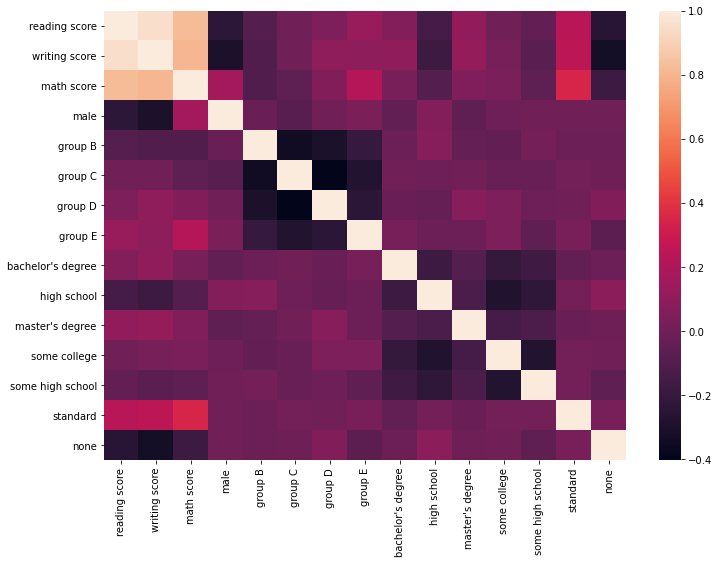

In [38]:
# Correlation of variables described using heatmap
# change the dimension of plot
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(marks_corr,ax=ax)

In [39]:
## split data set for linear1 regression
train,test=train_test_split(marks,test_size=0.25,random_state=5)
x_train=train.drop('math score',axis=1)
y_train=train['math score']
x_test=test.drop('math score',axis=1)
y_test=test['math score']

In [40]:
# creating first model with all variables: Ordinary Least Square(OLS) Technique used
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
model = regressor.fit(x_train, y_train)

In [41]:
r_sq = model.score(x_train, y_train)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)


coefficient of determination: 0.8909789876853764
intercept: 2.967876996492194
slope: [17.81981503 62.54938889 13.76861164  1.8170669   1.29227404  1.18615409
  6.02872549 -1.54965365  0.90068372 -1.87540896  0.26705824  0.14469549
  3.6335476   3.39323099]


In [42]:
train.columns

Index(['reading score', 'writing score', 'math score', 'male', 'group B',
       'group C', 'group D', 'group E', 'bachelor's degree', 'high school',
       'master's degree', 'some college', 'some high school', 'standard',
       'none'],
      dtype='object')

#### Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features

In [103]:
from sklearn.feature_selection import RFE
regressor = LinearRegression()
rfe = RFE(regressor, 7) # selecting best 7 features
rfe = rfe.fit(x_train, y_train)
#print(rfe.support_)
#print(rfe.ranking_)
L=list(train.columns)
rank=list(rfe.ranking_)
feature=[]
for i in range(len(rfe.support_)):
    if rank[i]==1:
        feature.append(L[i])
print(feature)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


IndexError: list index out of range

In [123]:
x_train_new = train[['reading score', 'writing score',  'group D', 'high school', 'some high school', 'standard']]

In [124]:
x_train_new.head()

,reading score,writing score,group D,high school,some high school,standard
517,0.753247,0.682353,0,1,0,1
196,0.714286,0.611765,0,0,0,0
551,0.558442,0.564706,0,0,1,1
250,0.402597,0.352941,0,0,0,0
68,0.818182,0.858824,0,0,0,0


In [125]:
x_train_New.shape

(525, 6)

In [126]:

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
model = regressor.fit(x_train_new, y_train)

In [127]:
r_sq = model.score(x_train_new, y_train)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.6998668226558238
intercept: 23.009657481362524
slope: [49.10284347 15.75598665  0.38270563  1.50948662 -1.22273426  4.971392  ]


## take test dataset

In [128]:
mark_test = pd.read_csv(r"C:\Users\Administrator\Desktop\Competition\dockship_Exam Marks\exam_mark_prediction_ai_challenge-dataset\test.csv")

In [129]:
mark_test.head()

,Unnamed: 0,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,0,female,group C,some college,standard,none,67,72
1,1,male,group E,some college,standard,none,60,59
2,2,female,group C,bachelor's degree,standard,none,93,95
3,3,male,group D,associate's degree,standard,none,48,46
4,4,female,group B,associate's degree,standard,none,76,80


In [130]:
mark_test = mark_test.drop(['Unnamed: 0'],axis = 1)

In [131]:
cols_to_norm = ['reading score','writing score']
mark_test[cols_to_norm] = scaler.fit_transform(mark_test[cols_to_norm])

In [132]:
mark_test.head()

,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group C,some college,standard,none,0.602410,0.688889
1,male,group E,some college,standard,none,0.518072,0.544444
2,female,group C,bachelor's degree,standard,none,0.915663,0.944444
3,male,group D,associate's degree,standard,none,0.373494,0.400000
4,female,group B,associate's degree,standard,none,0.710843,0.777778


In [133]:
## create dummy variables
## create dummy variable
gender_dummy = pd.get_dummies(mark_test['gender'],drop_first = True)
ethnicity_dummy = pd.get_dummies(mark_test['ethnicity'],drop_first = True)
parental_dummy = pd.get_dummies(mark_test['parental level of education'],drop_first = True)
lunch_dummy = pd.get_dummies(mark_test['lunch'],drop_first = True)
course_dummy = pd.get_dummies(mark_test['test preparation course'],drop_first = True)


In [134]:
## concate along column wise 
mark_test = pd.concat([mark_test,gender_dummy,ethnicity_dummy,parental_dummy,lunch_dummy,course_dummy],axis = 1)

In [135]:
mark_test = mark_test.drop(['gender', 'ethnicity','parental level of education','lunch','test preparation course'], axis=1)

In [136]:
mark_test.head()

,reading score,writing score,male,group B,group C,group D,group E,bachelor's degree,high school,master's degree,some college,some high school,standard,none
0,0.602410,0.688889,0,0,1,0,0,0,0,0,1,0,1,1
1,0.518072,0.544444,1,0,0,0,1,0,0,0,1,0,1,1
2,0.915663,0.944444,0,0,1,0,0,1,0,0,0,0,1,1
3,0.373494,0.400000,1,0,0,1,0,0,0,0,0,0,1,1
4,0.710843,0.777778,0,1,0,0,0,0,0,0,0,0,1,1


In [137]:
mark_test = mark_test[['reading score', 'writing score',  'group D', 'high school', 'some high school', 'standard']]

In [138]:
mark_test.head()

,reading score,writing score,group D,high school,some high school,standard
0,0.602410,0.688889,0,0,0,1
1,0.518072,0.544444,0,0,0,1
2,0.915663,0.944444,0,0,0,1
3,0.373494,0.400000,1,0,0,1
4,0.710843,0.777778,0,0,0,1


In [139]:
x_train_new.head()

,reading score,writing score,group D,high school,some high school,standard
517,0.753247,0.682353,0,1,0,1
196,0.714286,0.611765,0,0,0,0
551,0.558442,0.564706,0,0,1,1
250,0.402597,0.352941,0,0,0,0
68,0.818182,0.858824,0,0,0,0


In [140]:
x_train_new.shape

(525, 6)

In [142]:
y_predict = model.predict(mark_test)

In [145]:
print(y_predict)

[68.4151998  61.9981314  87.82334334 53.005766   75.14013666 90.36481195
 59.53149996 75.10630829 79.48897944 71.93370594 75.44800512 69.13960226
 69.57743307 85.52334221 56.61893053 57.9233287  64.85590467 82.22681137
 61.69026294 61.86532946 77.26507127 76.1908247  78.14069279 79.24180711
 49.32053577 53.63680595 40.05139893 56.41686237 62.91860825 42.94573194
 48.96479168 63.68527529 70.64908888 64.69081907 82.28160753 76.39846381
 76.9813392  75.5328232  74.79000362 65.23290546 70.51628695 56.29264495
 69.34724137 58.14353948 53.87266239 79.23907575 60.63986383 68.0412193
 71.02306938 57.02414864 60.46479731 72.97566884 67.53986721 86.53147674
 77.51785464 64.64826556 68.94068828 60.84750294 76.18372347 84.93174169
 70.50918572 67.98897381 70.19561242 58.4541393  83.99000813 61.03514113
 65.24547713 79.18111098 68.59055524 61.82306488 79.00604447 56.19367139
 72.4900025  43.46820013 61.3401299  69.83986833 74.83514789 78.30007355
 45.72305699 64.36726486 66.64068715 75.14013666 74.

In [146]:
output1 = pd.DataFrame(y_predict,columns= ['math score'])

In [147]:
output1

,math score
0,68.415200
1,61.998131
2,87.823343
3,53.005766
4,75.140137
...,...
295,78.164540
296,62.414665
297,63.582455
298,93.222585


In [149]:
output1.to_csv(r"C:\Users\Administrator\Desktop\output.csv")


In [ ]:
output = pd.concat([mark_test,output1],axis = 1)

In [ ]:
output.head()

In [ ]:
output['idx'] = 